In [54]:
%load_ext autoreload
%autoreload 2

# Load experiment_groups from disk
import dill
from disruption_survival_analysis.sweep_config import get_experiments, create_experiment_groups

#device = 'synthetic'
#dataset_path = 'test'
devices = ['cmod']
#dataset_paths = ['preliminary_dataset_no_ufo']
#dataset = 'sql_all_no_ufo'
dataset='paper'
dataset_paths = [f"{dataset}/stack_10"]

# models, alarms, metrics, and minimum warning times to use
models = ['rf', 'km', 'cph', 'dcph', 'dsm']
alarms = ['sthr']
metrics = ['auroc']
min_warning_times = [0.1]

experiment_groups = create_experiment_groups(devices, dataset_paths, models, alarms, metrics, min_warning_times)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


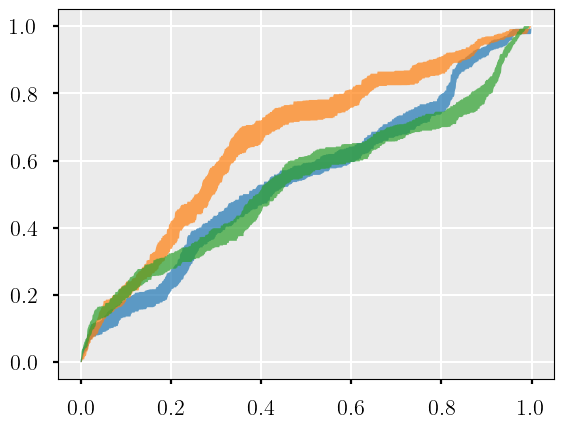

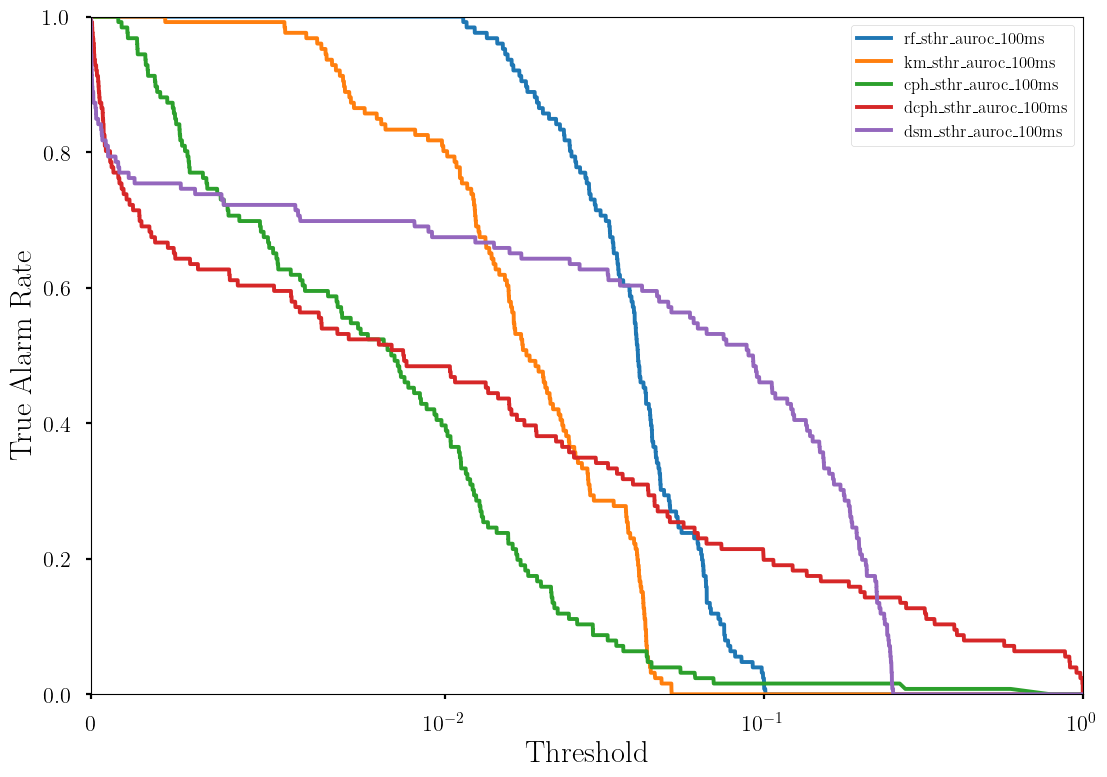

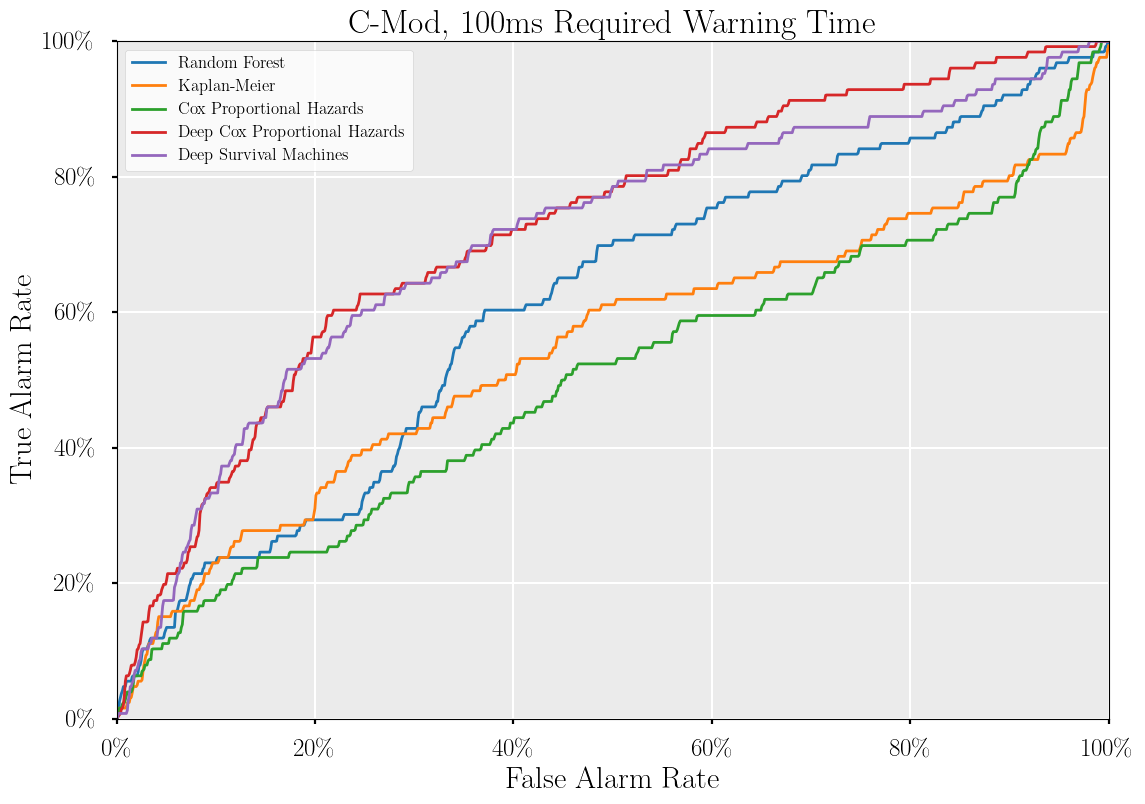

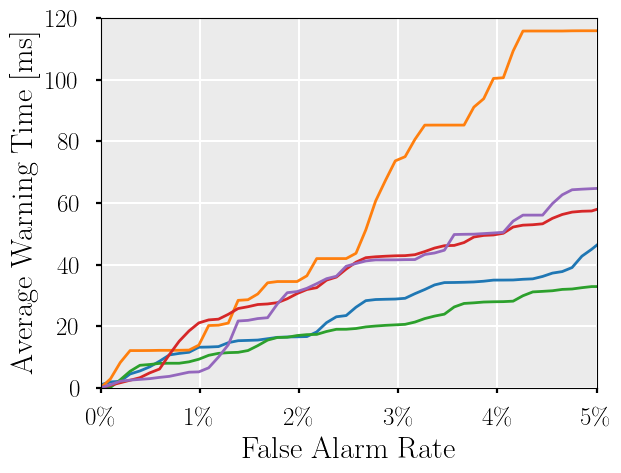

In [55]:
from disruption_survival_analysis.plot_experiments import plot_true_alarm_rates_vs_thresholds, plot_false_alarm_rates_vs_thresholds, plot_warning_times_vs_thresholds
from disruption_survival_analysis.plot_experiments import plot_true_alarm_rates_vs_false_alarm_rates, plot_missed_alarm_rates_vs_false_alarm_rates, plot_avg_warning_times_vs_false_alarm_rates

experiment_list = get_experiments(experiment_groups, ['auroc'])
plot_true_alarm_rates_vs_thresholds(experiment_list)
plot_true_alarm_rates_vs_false_alarm_rates(experiment_list)
plot_avg_warning_times_vs_false_alarm_rates(experiment_list, min_warning_times[0])

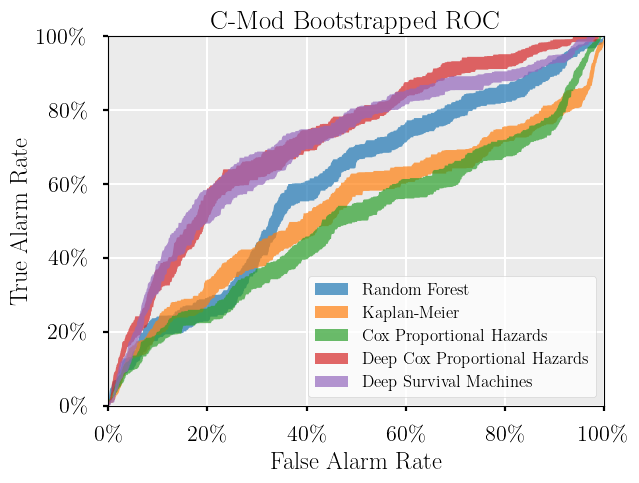

In [57]:
# Plot the mean true alarm rates with the upper and lower quartiles
import matplotlib.pyplot as plt
from disruption_survival_analysis.plot_experiments import pretty_name
import matplotlib as mpl

plt.figure()
PLOT_STYLE = 'seaborn-v0_8-poster'
plt.style.use(PLOT_STYLE)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.grid(True, color='w', linestyle='-', linewidth=1.5)
plt.gca().patch.set_facecolor('0.92')
plt.gca().set_axisbelow(True)

for experiment in experiment_list:
    # Load bootstrap results
    bootstrap_results_path = f"results/{experiment.device}/{experiment.dataset_path}/bootstraps/{experiment.name}_bootstrap.pkl"
    bootstrapped_metrics = dill.load(open(bootstrap_results_path, 'rb'))

    unique_fars = bootstrapped_metrics['fars']

    upper_tars = bootstrapped_metrics['upper_tars']
    lower_tars = bootstrapped_metrics['lower_tars']

    #plt.plot(unique_fars, max_tars, label='Max')
    #plt.plot(unique_fars, upper_tars, label='Upper Quartile')
    #plt.plot(unique_fars, mean_tars, label='Mean')
    #plt.plot(unique_fars, lower_tars, label='Lower Quartile')
    #plt.plot(unique_fars, min_tars, label='Min')
    plt.fill_between(unique_fars, lower_tars, upper_tars, alpha=0.7, label=pretty_name(experiment.name))

plt.xlabel('False Alarm Rate')
plt.ylabel('True Alarm Rate')

# put legend in lower right
plt.legend(loc='lower right', fontsize=12)

plt.xlim([0, 1])
plt.ylim([0, 1])

# Put ticks at percents
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1],
            ["0\%", "20\%", "40\%", "60\%", "80\%", "100\%"])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1],
            ["0\%", "20\%", "40\%", "60\%", "80\%", "100\%"])

plt.title(f"C-Mod Bootstrapped ROC")

plt.show()
plt.rcParams.update(mpl.rcParamsDefault)


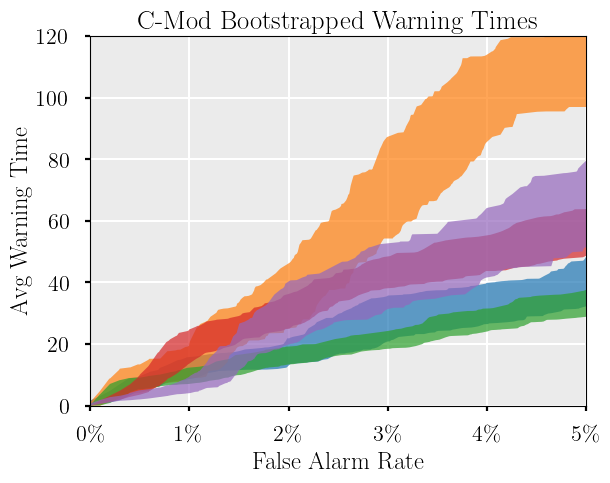

In [45]:
plt.figure()

plt.style.use(PLOT_STYLE)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.grid(True, color='w', linestyle='-', linewidth=1.5)
plt.gca().patch.set_facecolor('0.92')
plt.gca().set_axisbelow(True)

for experiment in experiment_list:
    # Load bootstrap results
    bootstrap_results_path = f"results/{experiment.device}/{experiment.dataset_path}/bootstraps/{experiment.name}_bootstrap.pkl"
    bootstrapped_metrics = dill.load(open(bootstrap_results_path, 'rb'))

    unique_fars = bootstrapped_metrics['fars']

    upper_warns = bootstrapped_metrics['upper_warns']
    lower_warns = bootstrapped_metrics['lower_warns']

    plt.fill_between(unique_fars, lower_warns*1000, upper_warns*1000, alpha=0.7, label=pretty_name(experiment.name))


plt.xlabel('False Alarm Rate')
plt.ylabel('Avg Warning Time')


plt.xlim([0, 0.05])
plt.ylim([0, 120])

plt.xscale('symlog')

# Make x ticks go from 0 to 0.05 in increments of 0.01
plt.xticks([0, 0.01, 0.02, 0.03, 0.04, 0.05],
            ["0\%", "1\%", "2\%", "3\%", "4\%", "5\%"])

#plt.legend(loc='upper left')

plt.title(f"C-Mod Bootstrapped Warning Times")

plt.show()
plt.rcParams.update(mpl.rcParamsDefault)